In [20]:
f = open("images/sino1.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [21]:
line[3:20]

'0.0000000e+00\t   '

In [22]:
import numpy as np
tooth3_3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        tooth3_3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

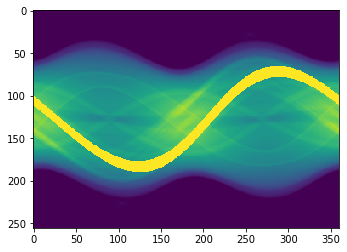

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(tooth3_3_img)
plt.colorbar

In [24]:
tooth3_3_img.shape

(256, 360)

In [25]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import requests
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
model = Sequential() # Sequeatial Model 
model.add(LSTM(1000, input_shape=(1, 9))) # (timestep, feature) 
model.add(Dense(255)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1000)              4040000   
_________________________________________________________________
dense_4 (Dense)              (None, 300)               300300    
Total params: 4,340,300
Trainable params: 4,340,300
Non-trainable params: 0
_________________________________________________________________


In [26]:
result_img = tooth3_3_img
window_size = 9
x_data = []
y_data = []
k = 0
for j in range(30):
    for i in range(256-window_size-1):
        if 0 in result_img[i:i+1+window_size,j]:
            z=0
        else:
            if result_img[i+1+window_size, j] == 300:
                if k == 0:
                    x_train_data = np.asarray(x_data)
                    y_train_data = np.asarray(y_data)
                    model.fit(x_train_data, y_train_data, epochs = 300, batch_size = 1)
                    k = k + 1
                    x_test_data = []
                    x_test_data.append([result_img[i:i+window_size,j]])
                    x_predict_data = np.asarray(x_test_data)
                    prediction = model.predict(x_predict_data)
                    result_img[i:i+1+window_size,j] = prediction[0,0]
                x_test_data = []
                x_test_data.append([result_img[i:i+window_size,j]])
                x_predict_data = np.asarray(x_test_data)
                prediction = model.predict(x_predict_data)
                result_img[i+1+window_size,j] = prediction[0,0]
            else:
                x_data.append([result_img[i:i+window_size,j]])
                y_data.append(result_img[i+1+window_size,j])

Epoch 1/300
64/64 [==============================] - 1s 16ms/step - loss: 12788.0352
Epoch 2/300
64/64 [==============================] - 1s 17ms/step - loss: 7706.6538
Epoch 3/300
64/64 [==============================] - 1s 16ms/step - loss: 4698.9302
Epoch 4/300
64/64 [==============================] - 1s 17ms/step - loss: 2858.0847
Epoch 5/300
64/64 [==============================] - 1s 17ms/step - loss: 1793.8435
Epoch 6/300
64/64 [==============================] - 1s 16ms/step - loss: 1254.7378
Epoch 7/300
64/64 [==============================] - 1s 17ms/step - loss: 861.1337
Epoch 8/300
64/64 [==============================] - 1s 17ms/step - loss: 557.0289
Epoch 9/300
64/64 [==============================] - 1s 16ms/step - loss: 485.4630
Epoch 10/300
64/64 [==============================] - 1s 18ms/step - loss: 506.5360
Epoch 11/300
64/64 [==============================] - 1s 17ms/step - loss: 464.2282
Epoch 12/300
64/64 [==============================] - 1s 17ms/step - loss: 385

64/64 [==============================] - 1s 16ms/step - loss: 77.5179
Epoch 99/300
64/64 [==============================] - 1s 17ms/step - loss: 69.8833
Epoch 100/300
64/64 [==============================] - 1s 16ms/step - loss: 87.5587
Epoch 101/300
64/64 [==============================] - 1s 17ms/step - loss: 73.5610
Epoch 102/300
64/64 [==============================] - 1s 17ms/step - loss: 75.4815
Epoch 103/300
64/64 [==============================] - 1s 17ms/step - loss: 83.5639
Epoch 104/300
64/64 [==============================] - 1s 17ms/step - loss: 72.9313
Epoch 105/300
64/64 [==============================] - 1s 16ms/step - loss: 76.8649
Epoch 106/300
64/64 [==============================] - 1s 17ms/step - loss: 69.7798
Epoch 107/300
64/64 [==============================] - 1s 17ms/step - loss: 89.1824
Epoch 108/300
64/64 [==============================] - 1s 16ms/step - loss: 81.8196
Epoch 109/300
64/64 [==============================] - 1s 17ms/step - loss: 96.6536
Epoch 1

64/64 [==============================] - 1s 17ms/step - loss: 118.2730
Epoch 195/300
64/64 [==============================] - 1s 16ms/step - loss: 102.5042
Epoch 196/300
64/64 [==============================] - 1s 17ms/step - loss: 101.1660
Epoch 197/300
64/64 [==============================] - 1s 17ms/step - loss: 140.8343
Epoch 198/300
64/64 [==============================] - 1s 17ms/step - loss: 118.8074
Epoch 199/300
64/64 [==============================] - 1s 17ms/step - loss: 141.7653
Epoch 200/300
64/64 [==============================] - 1s 16ms/step - loss: 182.5514
Epoch 201/300
64/64 [==============================] - 1s 17ms/step - loss: 170.9207
Epoch 202/300
64/64 [==============================] - 1s 16ms/step - loss: 152.7598
Epoch 203/300
64/64 [==============================] - 1s 17ms/step - loss: 131.8101
Epoch 204/300
64/64 [==============================] - 1s 17ms/step - loss: 113.9910
Epoch 205/300
64/64 [==============================] - 1s 17ms/step - loss: 95.

64/64 [==============================] - 1s 17ms/step - loss: 92.9243
Epoch 291/300
64/64 [==============================] - 1s 16ms/step - loss: 137.03710s -
Epoch 292/300
64/64 [==============================] - 1s 17ms/step - loss: 123.4195
Epoch 293/300
64/64 [==============================] - 1s 17ms/step - loss: 109.8299
Epoch 294/300
64/64 [==============================] - 1s 16ms/step - loss: 93.6032
Epoch 295/300
64/64 [==============================] - 1s 17ms/step - loss: 88.4617
Epoch 296/300
64/64 [==============================] - 1s 17ms/step - loss: 91.5423
Epoch 297/300
64/64 [==============================] - 1s 16ms/step - loss: 96.8998
Epoch 298/300
64/64 [==============================] - 1s 17ms/step - loss: 79.9502
Epoch 299/300
64/64 [==============================] - 1s 16ms/step - loss: 83.9205
Epoch 300/300
64/64 [==============================] - 1s 17ms/step - loss: 72.8276


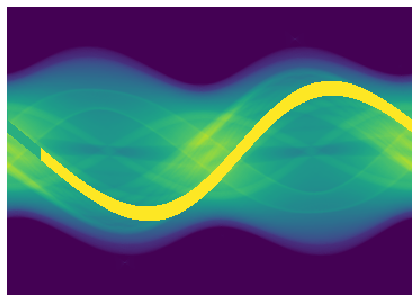

In [27]:
plt.imshow(result_img[:,:])
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RNN1.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [57]:
# np.savetxt('images/tooth3_training_txt.txt', result_img)